![](CP.jpg)


# ----------------------------------------------------------------------------------------------------------

## Objective:

The Objective of the case study is to find an optimally accurate ML model to predict Pneumonia using X-Ray images by applying different techniques like pre-processing and optimizationin the Image dataset provided.

"Pneumonia is the single largest cause of death in children worldwide. Every year, it kills an estimated 1.4 million children under the age of five years, accounting for 18% of all deaths of children under five years old worldwide. Pneumonia affects children and families everywhere, but is most prevalent in South Asia and sub-Saharan Africa. Children can be protected from pneumonia, it can be prevented with simple interventions, and treated with low-cost, low-tech medication and care." (Journal published by WHO on 12th Nov)

# ----------------------------------------------------------------------------------------------------------

## Problem Statement:

Accurately detect Pneumonia from X-Ray images by means of a Machine Learning Model.

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric
patients of one to five years old from Guangzhou Women and Children’s Medical Center,
Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image
category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories
(Pneumonia/Normal).

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality
control by removing all low quality or unreadable scans. The diagnoses for the images were
then graded by two expert physicians before being cleared for training the AI system. In order to
account for any grading errors, the evaluation set was also checked by a third expert.



# ----------------------------------------------------------------------------------------------------------

## Procedure:

The Case study for detection of pnuemonia from Xrays After loading images, tried with different image processing technique. After feature extraction applied PCA on the train data in order reduce the features with explained variance .99 for undersampling,.95 for oversampling and combined method. Creating different models with the parameter which are tuned by hyperparameter tuning using Train and Val data. Testing the model accuracy using Test data.

### Importing Libraries
Some of the important libraries used in this case study are listed below:
- numpy 
- pandas
- cv2
- tqdm
- shuffle
- pickle
- PCA
- PredefinedSplit
- svm
- KNeighborsClassifier
- RandomForestClassifier 
- DecisionTreeClassifier
- RandomUnderSampler 
- SMOTE
- GridSearchCV
- accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
- plot_confusion_matrix


#### Below flow chart represents the major steps invovled in this analysis for Pneumonia Detection using X-Ray Images.

<img src="Capture.JPG" width="800"/>

### Image Loading

Image loading step involves setting up the environment to load the dataset and organising them for further processing. In the casestudy, the dataset has been loaded from different folders and  re-organised into 
Setup all the folder path, with that load X-ray images from different folders and create X_train, Y_train, X_test, Y_test, X_Val and Y_val.

Defined a function `load_images` with parameters `img_path` and `label` to load images from respective folders.`img_path` indicate the path of the image (eg: normal from train folder).Label indicate is it a normal image or Pneumonia.

- Reading images from the path using cv2 and used tqdm module for showing progress bar in the program.
- called `image_preprocessing` function and append preprocessed image to array and return the same along with the label.
  

### Image Preprocessing

In Image pre-processing step, the operations are performed on images at the lowest level of abstraction and aim to improve the image data by suppressing undesired distortions or enhance some image features for further processing.The output of this step gives an image in which the features are extracted.

##### Module Used:
- OpenCV (Open Source Computer Vision)

##### Techniques Used:
- Gaussian Blur
- Scaling
- Clahe
- Erode
- EqulizeHist
- Interpolation Techniques

##### Observation:
Clahe technique gave addition 2% increase in accuracy (from 79 to 81) for SVM and 4% increase in KNN (79% to 83%).
Additionally , performing equalizeHist in conjunction with Clahe and interpolation as inter_Area, a minor improvement in of 1%  in accuracy for KNN was achieved. Attached image shows them image enhancement.

<img src="IP.JPG" width="800" />

### Label Encoding 

In Label Encoding step, the labels are converted into converting numeric format to make it machine-readable for further processing.
The Approach used is to consider the scenario as `BINARY CLASSIFICATION` problem.All the normal cases are classified as `0` and infected with pneumonia (bacteria and virus) as `1`.

### Resampling

As our dataset contain more pneumonia data (75%) than normal data, our model will lead to bias during the training of the model. The class containing a higher number of samples will be preferred more over the classes containing a lower number of samples and having a biased dataset will in turn increase the true-negative and false-positive rates. Hence to overcome this bias of the model we need to make the dataset balanced containing an approximately equal number of samples in all the classes.

For this case study, implemented 3 different methods to handle imbalanced data

Method 1: Under-sampling
- `RandomUnderSampler` from `imblearn` package with random_state=1,Random sampling techique randomly deletes examples in the majority class and resampled the train dataset

Method 2: Over-sampling
- `SMOTE` is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier. SMOTE actually performs better than simple oversampling, but although it is not quite popular with images as much as its popularity when dealing with structured data.

Method 3: Combined
- `SMOTETomek` -The default is to balance the dataset with SMOTE then remove Tomek links from all classes.
- `DataAugmentation and RandomUnderSampler`-The minority class data is oversampled using rotate function and the majority class has undersampled using RandomUnderSampler.


<img src="Sampling.JPG" width="800" />

The image shows the distribution of dataset after applying the above resampling methods. We can infer that, the count for +ve Pneumonia dataset has reduced for undersampling and -ve Pneumonia dataset increased for oversampling.

### PCA
Principal Component Analysis is used for dimensionality reduction, whereby reducing the number of input variables for a predictive modeling.
##### Steps involved 
- PCA calculated based on train set.
- Projecting the validation, test dataset onto the reduced feature space obtained in the above train step.

### Hyperparameter tuning

After performing PCA, Hyperparameter tuning is perfomed by choosing a set of optimal hyperparameters for a learning algorithm. Training data is used to optimize the model's parameter value and validation data evalute the optimized model.

##### Steps involved 
- combine train and validation for hyperparameter tuning and provide validation dataset explicitly for hyper parameter tuning
- create a variable `val_fold` and set -1 for train set and 0 for val set.The val_fold which have zero or positive values, will be kept in test.
- use `PredefinedSplit` from `sklearn.model_selection` returns the number of splitting iterations in the cross-validator.

Define a function `gridsearchCV_model`. implemented hyper parameter tuning for `SVM`, `KNN`, `RandomForest`, `Decisontree` and set `cv` value obtained from as predefinedSplit function of combined train and val dataset.

###### Note: Implemented without validation split (cv=5, general convention), the accuracy obtained was more or less the same

### Model Training
Trained model using parameters which is selected after hyperparameter tuning and train dataset.

Algorithms Used:
- SVM
- KNN
- RFC
- Decision tree
- XGboost


### Model Evalution and Testing
As model is classification model,below metrics are used to evalute the model.

- Accuracy : Accuracy is defined as the ratio of correct predictions to total predictions made.


- Recall — Also called Sensitivity, Probability of Detection, True Positive Rate : The ratio of correct positive predictions to the total positives examples.


- Precision — Also called Positive predictive value :The ratio of correct positive predictions to the total predicted positives.


- The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


<img src="CM1.JPG" width="800" />

## Procedure- CNN(Convolutional Neural Network 

### Image Preprocessing
In the case of CNN image Processing is followed as read image as grayscale and resized it into 100*100.

### Label Encoding
The Approach used is to consider the scenario as BINARY CLASSIFICATION problem. All the normal cases are classified as 0 and infected with pneumonia (bacteria and virus) as 1.
After the label encoding processing all the objects are saved(pickled for further use).


### Label Preprocessing
- In order to feed to neural network labels are converted to one hot format with the help of `OneHotEncoder` object taken from `Scikit-Learn` module.
- As the shape expected by OneHotEncoder, creating new axis on y_train and y_val.  
- Converting y data using OneHotEncoder and the encoded labeled save to y_train_one_hot and y_val_one_hot.


### Reshaping X data
The convolution layer expects a color channel to be included as its input hence changing the shape of X data. As the image is grayscale, need to add a new axis 1 dimension which is going to be recognized by the convolution layer as the only color channel.
After running the shape of x_train has changed to (5216, 200, 200, 1).

### Data augmentation
Data augmentation means increase the number of data used for training by creating more samples with some sort of randomness on each of them. This randomness might include translations, rotations, scaling, shearing, and flips. Below are the data augmentation technique used.

- rotation_range: Int. Degree range for random rotations.
- Zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
- width_shift_range: Float, 1-D array-like or int - float: fraction of total width, if < 1, or pixels if >= 1. - 1-D array-like: random elements from the array. - int: integer number of pixels from interval (-width_shift_range, +width_shift_range) - With width_shift_range=2 possible values are integers [-1, 0, +1], same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).
- height_shift_range: Float, 1-D array-like or int - float: fraction of total height, if < 1, or pixels if >= 1. - 1-D array-like: random elements from the array. - int: integer number of pixels from interval (-height_shift_range, +height_shift_range) - With height_shift_range=2 possible values are integers [-1, 0, +1], same as with height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are floats in the interval [-1.0, +1.0).


### CNN 
build the neural network architecture with the input layer, so this layer takes all the sample images from X train data. input layer accepts the exact same shape as the image. Afterwards, input layer connected to several convolution and pooling layer before its flattened and connected to dense layers.

Hidden layers are used `relu` activation function which is faster. The last output layer which has 2 neurons with `sigmoid` activation function. When it’s a binary classification sigmoid will be more value added.

After model constructed,compiling the model with loss as `binary_crossentropy`.As the final result will be 0 and 1 hence binary_crossentropy will be good for this model.

Train the model using traingen object and validation data with epoch 20.

### Model Evalution and Testing
Used the above mentioned metrics like accuracy,Recall and precision for evaluting the performance of the model.

# -------------------------------------------------------------------------------------------------------

## Python Code

In [1]:
# importing Required Libraries

import os
import numpy as np
import pandas as pd
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import cv2
from tqdm import tqdm
import seaborn as sns
from sklearn.utils import shuffle
import pickle

from sklearn.decomposition import PCA
from sklearn.model_selection import PredefinedSplit
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler 

##### Setting location of train, test, validation datasets which include normal and pneumonia X ray images

In [2]:
path=os.getcwd()
# getting location of train
path_train_normal=path+"\\chest_xray\\train\\NORMAL\\"
path_train_pneumonia=path+"\\chest_xray\\train\\PNEUMONIA\\"
# getting location of test
path_test_normal=path+"\\chest_xray\\test\\NORMAL\\"
path_test_pneumonia=path+"\\chest_xray\\test\\PNEUMONIA\\"
# getting location of val
path_val_normal=path+"\\chest_xray\\val\\NORMAL\\"
path_val_pneumonia=path+"\\chest_xray\\val\\PNEUMONIA\\"

 ##### Defined  function for image preprocessing using CV2,OpenCV-Python is a library of Python bindings designed to solve computer vision problems. The function contain below steps:
 - cv2.cvtColor -- To convert an image from one color space to another, here changing to gray scale.
 - cv2.resize -- Image resizing refers to the scaling of images with or without interpolation.
 - flatten --Return a copy of the array collapsed into one dimension.
 

In [3]:
def image_preprocessing(image,label): 

    
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        image = clahe.apply(image)  
        image = cv2.equalizeHist(image)
        image = cv2.resize(image, dsize=(100,100),interpolation = cv2.INTER_AREA)
        
        image=image.flatten()
        
        
        return image

def image_preprocessingCNN(image,label):
          
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, dsize=(100,100))             
               
        return image  



################################## not used #####################################################################

def image_preprocessingTest1(image,label):
#81 svm KNN
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        image = clahe.apply(image)  
        
        image = cv2.resize(image, dsize=(100,100),interpolation = cv2.INTER_AREA)
        image = cv2.equalizeHist(image)
        image=image.flatten()
        
        return image


def image_preprocessingTest2(image,label):
    #81svm 83knn
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
       
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        image = clahe.apply(image)  
        
        image = cv2.resize(image, dsize=(100,100),interpolation = cv2.INTER_AREA)
        #image = cv2.equalizeHist(image)
        image=image.flatten()
        
        return image

def image_preprocessingTest3(image,label):
    
    if label=='N':        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((3,3),np.uint8)
        image = cv2.erode(image, kernel, iterations=1)
        image = cv2.resize(image, dsize=(100,100),interpolation = cv2.INTER_NEAREST)
        image = cv2.equalizeHist(image)
        image=image.flatten()
        
    elif label=='P':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((3,3),np.uint8)
        image = cv2.erode(image, kernel, iterations=1)
        image = cv2.resize(image, dsize=(100,100),interpolation = cv2.INTER_CUBIC)
        image = cv2.equalizeHist(image)
        image=image.flatten()
        
    return image  
 

#### Defined `load_images` function for loading images from the path
- Reading images from the path using cv2 and used tqdm for showing progress bar.
- called `image_preprocessing` function and append preprocessed image to array and return the same along with the label.

In [4]:
def load_images(img_path,label):
    img_files = np.array(os.listdir(img_path))
    if label=='N':
        img_labels = np.array(['normal']*len(img_files))
    elif label=='P':
        img_labels = np.array([img_file.split('_')[1] for img_file in img_files])
        
    img_images = []
    for image in tqdm(img_files):
        image = cv2.imread(img_path + image)        
        image=image_preprocessing(image,label)
        #to load CNN
        #image=image_preprocessingCNN(image,label)
        img_images.append(image)
        
    img_images = np.array(img_images)
    
    return img_images, img_labels

##### Load images from `train` dataset & Create `X_train` and `y_train` using the image and label extracted from `train` dataset

In [5]:
norm_images, norm_labels = load_images(path_train_normal,'N')
pneu_images, pneu_labels = load_images(path_train_pneumonia,'P')
X_train = np.append(norm_images, pneu_images, axis=0)
y_train = np.append(norm_labels, pneu_labels)
print(X_train.shape)
print(y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [03:02<00:00, 21.19it/s]

(5216, 10000)
(5216,)


##### Load images from `test` dataset & Create `X_test` and `y_test` using the image and label extracted from `test` dataset

In [6]:
norm_images_test, norm_labels_test = load_images(path_test_normal,'N')
pneu_images_test, pneu_labels_test = load_images(path_test_pneumonia,'P')
X_test = np.append(norm_images_test, pneu_images_test, axis=0)
y_test = np.append(norm_labels_test, pneu_labels_test)
print(X_test.shape)
print(y_test.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:15<00:00, 25.59it/s]

(624, 10000)
(624,)


##### Load images from `validation` dataset & Create `X_val` and `y_val` using the image and label extracted from `val` dataset

In [7]:
norm_images_val, norm_labels_val = load_images(path_val_normal,'N')
pneu_images_val, pneu_labels_val= load_images(path_val_pneumonia,'P')
X_val = np.append(norm_images_val, pneu_images_val, axis=0)
y_val = np.append(norm_labels_val, pneu_labels_val)
print(X_val.shape)
print(y_val.shape)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.61it/s]

(16, 10000)
(16,)


##### Label encoding
- Checking the value and counts
- converting normal to zero and bacteria and virus to one.

In [8]:
print('Train -', np.unique(y_train,return_counts=True))
print('Test -',np.unique(y_test,return_counts=True))
print('Val -',np.unique(y_val,return_counts=True))

Train - (array(['bacteria', 'normal', 'virus'], dtype='<U8'), array([2530, 1341, 1345], dtype=int64))
Test - (array(['bacteria', 'normal', 'virus'], dtype='<U8'), array([242, 234, 148], dtype=int64))
Val - (array(['bacteria', 'normal'], dtype='<U8'), array([8, 8], dtype=int64))


In [9]:
#label encoding for train
y_train=np.where(y_train =='normal', 0, y_train)
y_train=np.where(y_train =='bacteria', 1, y_train)
y_train=np.where(y_train =='virus', 1, y_train)
print('Train -', np.unique(y_train,return_counts=True))

#label encoding for test
y_test=np.where(y_test =='normal', 0, y_test)
y_test=np.where(y_test =='bacteria',1, y_test)
y_test=np.where(y_test =='virus',1, y_test)
print('Test -',np.unique(y_test,return_counts=True))

y_val=np.where(y_val =='normal', 0, y_val)
y_val=np.where(y_val =='bacteria', 1, y_val)
print('Val -',np.unique(y_val,return_counts=True))

Train - (array(['0', '1'], dtype='<U8'), array([1341, 3875], dtype=int64))
Test - (array(['0', '1'], dtype='<U8'), array([234, 390], dtype=int64))
Val - (array(['0', '1'], dtype='<U8'), array([8, 8], dtype=int64))


###### pickling objects for CNN after  executing `load_images` with `image_preprocessingCNN`

In [10]:
# import pickle
# with open('obj_cnn.pkl', 'wb') as f:  
#     pickle.dump([X_train,y_train,X_val,y_val,X_test,y_test], f)

###### pickling objects for model creations after executing `load_images` with `image_preprocessing`

In [11]:

with open('obj.pkl', 'wb') as f:  
    pickle.dump([X_train,y_train,X_val,y_val,X_test,y_test], f)

In [12]:
##### Randomly ploting the images

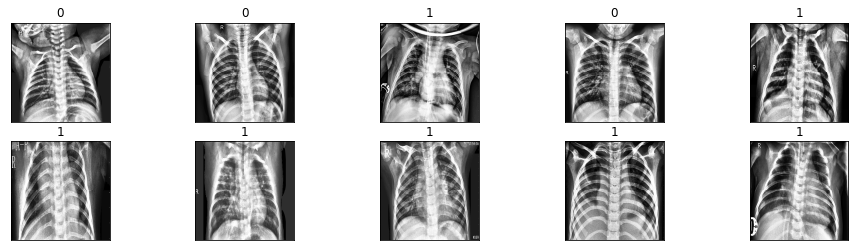

In [13]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))

indices = np.random.choice(len(X_train), 10)
counter = 0

for i in range(2):
    for j in range(5):
        axes[i,j].set_title(y_train[indices[counter]])
        axes[i,j].imshow(X_train[indices[counter]].reshape(100,100), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()

###### checking the dataset distribution for Normal and Pneumonia for  `train `set

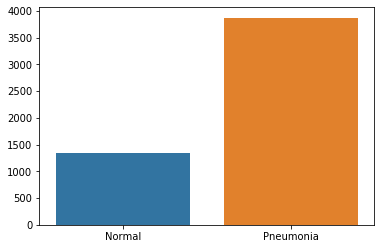

In [14]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(y_train[y_train =='0']),len(y_train[y_train =='1'])])

###### The above barplot clearly shows that the dataset is highly imbalanced,it's 25%-75% for Normal and Pneumonia

##### Handling Imbalanced dataset
method 1 -As the dataset is highly imbalanced, using down sampling technique RandomUnderSampler

# ---------------------------------------------------------------------------------------------------------

## UNDER SAMPLING

## MODEL 1 using RandomUnderSampler

In [15]:
rus = RandomUnderSampler(random_state=1)
X_train_usample, y_train_usample = rus.fit_resample(X_train, y_train) 

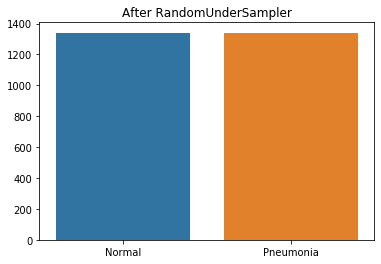

In [16]:
plt.title('After RandomUnderSampler')
sns.barplot(x=['Normal','Pneumonia'],y=[len(y_train_usample[y_train_usample =='0']),len(y_train_usample[y_train_usample =='1'])])

In [17]:
#X_train_usample, y_train_usample = shuffle(X_train_usample, y_train_usample,random_state=1)

#### PCA

- Applied(fit and transform) PCA on train set for dimensionality reduction.
- using the fitted pca to transform val and dataset to approriate dimesions.

In [18]:
# pricipal component calculated based on train set 
pca = PCA(n_components=.99)
pc_train = pca.fit_transform(X_train_usample)
Xtrain_df = pd.DataFrame(data = pc_train)

# Projecting the val set onto the reduced feature space obtained during the training.
pc_val = pca.transform(X_val)
Xval_df = pd.DataFrame(data = pc_val)

# Projecting the test set onto the reduced feature space obtained during the training.
pc_test = pca.transform(X_test)
Xtest_df = pd.DataFrame(data = pc_test)



#### Hyperparameter tuning


hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm.Training data optimize the model's parameter value. testing data evalute the optimized model.

combine train and validation for hyperparameter tuning,provide val dataset explicitly for hyper parameter tuning
create a variable val_fold and set -1 for train set and 0 for val set.The val_fold which have zero or positive values, will be kept in test.
use PredefinedSplit from sklearn.model_selection returns the number of splitting iterations in the cross-validator.


In [19]:
# combining train and validation for hyperparameter tuning
Xtrain_combined=pd.concat([Xtrain_df, Xval_df], ignore_index=True)
ytrain_combined=np.concatenate((y_train_usample,y_val))
# setting -1 for train set and 0 for val set.The val_fold which have zero or positive values, will be kept in test.
val_fold = np.repeat([-1, 0], [len(Xtrain_df), len(Xval_df)])
# using PredefinedSplit returns the number of splitting iterations in the cross-validator
ps = PredefinedSplit(val_fold)

Define a function gridsearchCV_model. In this function wrote code for hyper parameter tuning for SVM, KNN, RandomForest, Decisontree and set cv as predefined split of combined train and val dataset.

In [20]:
def gridsearchCV_model(Xtrain_combined,ytrain_combined,classifier):
       
    if classifier=='SVM':
        model = svm.SVC()
        param_grid = [
          {'C': [.001,.01,1, 10, 100], 'kernel': ['linear']}]
           # {              'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
        
          
            
    elif classifier=='KNN':
        k_range = list(range(1, 15))
        param_grid = dict(n_neighbors=k_range)
        model=KNeighborsClassifier()  
    
    elif classifier=='RFC':
        model = RandomForestClassifier(random_state=42)
        param_grid = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
        }
    
    elif classifier=='DTC':
        model=DecisionTreeClassifier(random_state=42)
        param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
        
        
    
    clf = GridSearchCV(model, param_grid,cv=ps ,n_jobs=8)
    clf.fit(Xtrain_combined, ytrain_combined)
    return clf

In [21]:
# function to validate the model

def performance_metrics(model,Xtest_df,y_test):
    
    # generate predictions
    y_pred = model.predict(Xtest_df)
   
    
    # Confusion matrix
    acc = round(accuracy_score(y_test, y_pred),4)
   
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1_score=round(2*precision*recall/(precision+recall),4)
    auc_score=round(roc_auc_score(y_test.astype(int), model.predict_proba(Xtest_df)[:, 1]),4)
    fp_rate,tp_rate,thresholds=roc_curve(y_test.astype(bool),model.predict_proba(Xtest_df)[:, 1])
    
   

    print('\nTEST METRICS ----------------------')
    
    print('Accuracy: {}%'.format(acc))
    print('Recall: {}%'.format(recall))
    print('Precision: {}%'.format(precision))
   
    print('F1-score: {}'.format(f1_score))
    print('AUC-score: {}'.format(auc_score))
   
    #print( auc(fp_rate,tp_rate))
    return [acc,precision,recall,f1_score,auc_score],fp_rate,tp_rate

In [22]:
col_list=['Classifier','Accuracy','Precision','Recall','F1-Score','AUC']
performance_metric_df1=pd.DataFrame(columns=col_list)


### Train & Test The Model 

- Extractt the best parameters for the classifiers using hypertuning (`gridsearchCV_model` function).
- Build the model with train data using best parameters.
- Performing testing the performance of model using unseen test data

### Support Vector Machine(SVM)

In [23]:

model_svm=gridsearchCV_model(Xtrain_combined,ytrain_combined,'SVM')
print("The best parameters are %s with a score of %0.2f"% (model_svm.best_params_, model_svm.best_score_))

# using obtained best params for model building
svc=svm.SVC(kernel=model_svm.best_params_['kernel'],C= model_svm.best_params_['C'],probability=True)
svc.fit(Xtrain_df,y_train_usample)


The best parameters are {'C': 0.001, 'kernel': 'linear'} with a score of 0.94


SVC(C=0.001, kernel='linear', probability=True)

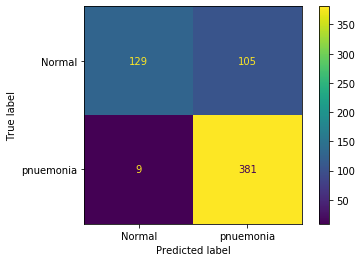

In [24]:
plot_confusion_matrix(svc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [25]:
val_list,svm_fpr1,svm_tpr1=performance_metrics(svc,Xtest_df,y_test)
performance_metric_df1.loc[len(performance_metric_df1)]=['SVM']+val_list


TEST METRICS ----------------------
Accuracy: 0.8173%
Recall: 0.9769%
Precision: 0.784%
F1-score: 0.8699
AUC-score: 0.9257


### k-nearest neighbors(KNN)

In [26]:
model_knn=gridsearchCV_model(Xtrain_combined,ytrain_combined,'KNN')
print("The best parameters are %s with a score of %0.2f"% (model_knn.best_params_, model_knn.best_score_))

knn=KNeighborsClassifier(n_neighbors=model_knn.best_params_['n_neighbors'])
knn.fit(Xtrain_df,y_train_usample)

The best parameters are {'n_neighbors': 6} with a score of 0.88


KNeighborsClassifier(n_neighbors=6)

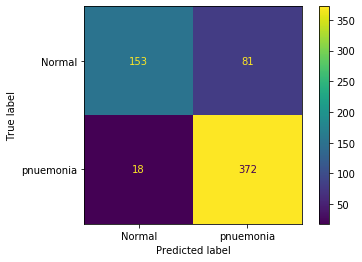

In [27]:
plot_confusion_matrix(knn, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [28]:
val_list,knn_fpr1,knn_tpr1=performance_metrics(knn,Xtest_df,y_test)
performance_metric_df1.loc[len(performance_metric_df1)]=['KNN']+val_list


TEST METRICS ----------------------
Accuracy: 0.8413%
Recall: 0.9538%
Precision: 0.8212%
F1-score: 0.8825
AUC-score: 0.8909


### xgboost

In [29]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
model2.fit(Xtrain_df, y_train_usample)

c:\users\sruth\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

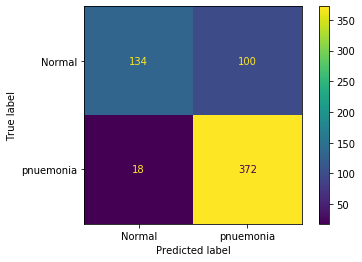

In [30]:
plot_confusion_matrix(model2, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [31]:
val_list,xg_fpr1,xg_tpr1=performance_metrics(model2,Xtest_df,y_test)
performance_metric_df1.loc[len(performance_metric_df1)]=['XGB']+val_list


TEST METRICS ----------------------
Accuracy: 0.8109%
Recall: 0.9538%
Precision: 0.7881%
F1-score: 0.8631
AUC-score: 0.9056


### Random Forest 

In [32]:
model_RFC=gridsearchCV_model(Xtrain_combined,ytrain_combined,'RFC')
print("The best parameters are %s with a score of %0.2f"% (model_RFC.best_params_, model_RFC.best_score_))

rfc=RandomForestClassifier(criterion=model_RFC.best_params_['criterion'],max_features=model_RFC.best_params_['max_features'],max_depth=model_RFC.best_params_['max_depth'],n_estimators=model_RFC.best_params_['n_estimators'])
rfc.fit(Xtrain_df,y_train_usample)

The best parameters are {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500} with a score of 0.81


RandomForestClassifier(max_depth=6, n_estimators=500)

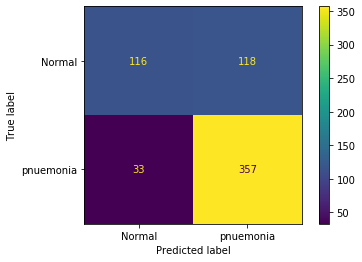

In [33]:
plot_confusion_matrix(rfc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [34]:
val_list,rfc_fpr1,rfc_tpr1=performance_metrics(rfc,Xtest_df,y_test)
performance_metric_df1.loc[len(performance_metric_df1)]=['RFC']+val_list


TEST METRICS ----------------------
Accuracy: 0.758%
Recall: 0.9154%
Precision: 0.7516%
F1-score: 0.8255
AUC-score: 0.829


### Decision Tree

In [35]:
model_DTC=gridsearchCV_model(Xtrain_combined,ytrain_combined,'DTC')
print("The best parameters are %s with a score of %0.2f"% (model_DTC.best_params_, model_DTC.best_score_))

dtc=DecisionTreeClassifier(max_leaf_nodes=model_DTC.best_params_['max_leaf_nodes'],min_samples_split=model_DTC.best_params_['min_samples_split'])
dtc.fit(Xtrain_df,y_train_usample)

The best parameters are {'max_leaf_nodes': 17, 'min_samples_split': 2} with a score of 0.81


DecisionTreeClassifier(max_leaf_nodes=17)

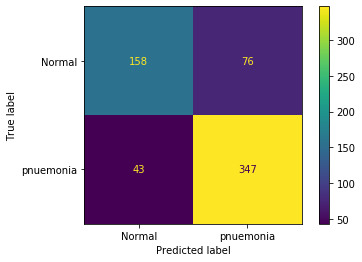

In [36]:
plot_confusion_matrix(dtc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [37]:
val_list,dtc_fpr1,dtc_tpr1=performance_metrics(dtc,Xtest_df,y_test)
performance_metric_df1.loc[len(performance_metric_df1)]=['DTC']+val_list


TEST METRICS ----------------------
Accuracy: 0.8093%
Recall: 0.8897%
Precision: 0.8203%
F1-score: 0.8536
AUC-score: 0.8521


In [38]:
def performance_classifiers(df_performance):
    Accuracy = list(df_performance.iloc[:,1])
    Precision =list(df_performance.iloc[:,2])
    Recall = list(df_performance.iloc[:,3])
    F1_Score =list(df_performance.iloc[:,4])
    AUC=list(df_performance.iloc[:,5])
    index = df_performance.iloc[:,0]
    df = pd.DataFrame({'Accuracy': Accuracy,
                       'Recall': Recall,
                       'AUC-score':AUC,
                       'Precision': Precision,                        
                       'F1-Score': F1_Score}, index=index)
    ax = df.plot.bar(figsize=(18,8),rot=0,colormap='Set3',width=.8)
    for p in ax.patches:
        ax.annotate(str(float (str (p.get_height())[:-1])), (p.get_x() * 1.005, p.get_height() * 1.005))


#### Evalution metric of all the classifiers used in undersampling(MODEL 1)

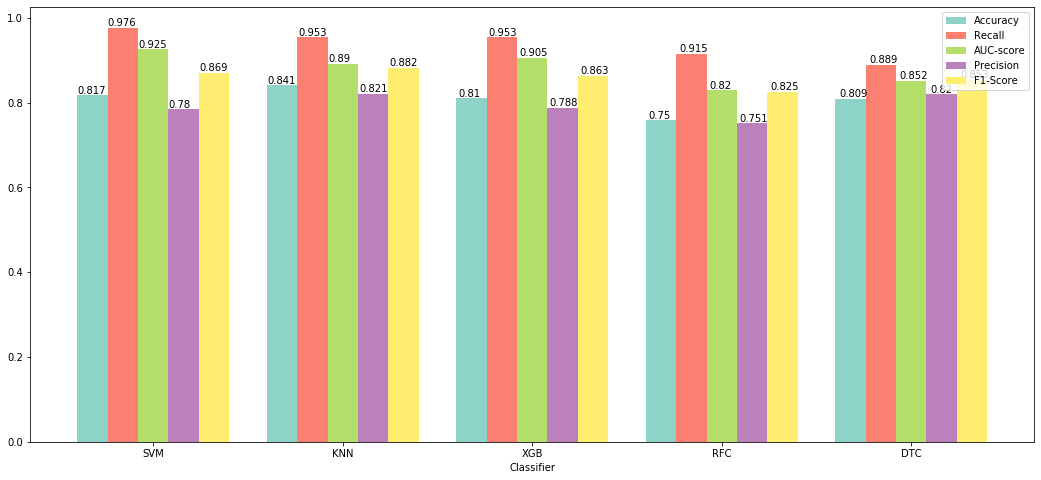

In [39]:
performance_classifiers(performance_metric_df1)

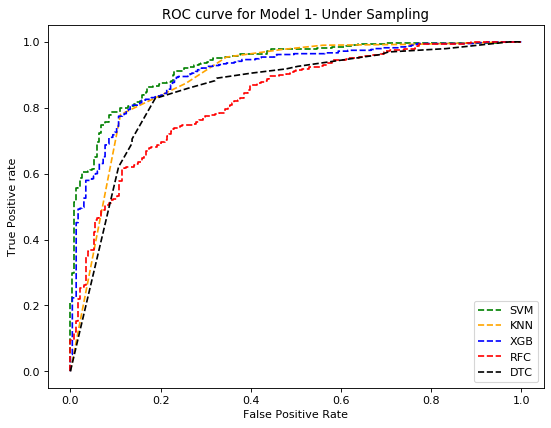

In [84]:
#plt.style.use('seaborn')
#plt.rcParams.update(plt.rcParamsDefault)

# plot roc curves
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(svm_fpr1, svm_tpr1, linestyle='--',color='green', label='SVM')
plt.plot(knn_fpr1, knn_tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(xg_fpr1, xg_tpr1, linestyle='--',color='blue', label='XGB')
plt.plot(rfc_fpr1, rfc_tpr1, linestyle='--',color='red', label='RFC')
plt.plot(dtc_fpr1, dtc_tpr1, linestyle='--',color='black', label='DTC')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Model 1- Under Sampling')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')


plt.show();

In [41]:
performance_metric_df1

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC
0,SVM,0.8173,0.7840,0.9769,0.8699,0.9257
1,KNN,0.8413,0.8212,0.9538,0.8825,0.8909
2,XGB,0.8109,0.7881,0.9538,0.8631,0.9056
3,RFC,0.7580,0.7516,0.9154,0.8255,0.8290
4,DTC,0.8093,0.8203,0.8897,0.8536,0.8521


# ----------------------------------------------------------------------------------------------------------

## OVER SAMPLING

## MODEL 2 using SMOTE


In [42]:
from imblearn.over_sampling import SMOTE

SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier. SMOTE actually performs better than simple oversampling, but although it is not quite popular with images as much as its popularity when dealing with structured data

In [43]:
# Getting back the pickled objects:
with open('obj.pkl','rb') as f: 
    X_train,y_train,X_val,y_val,X_test,y_test = pickle.load(f)

In [44]:
sm = SMOTE(random_state=1)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

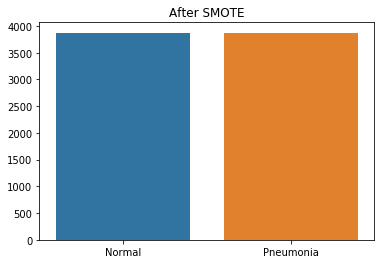

In [80]:
plt.title('After SMOTE')
sns.barplot(x=['Normal','Pneumonia'],y=[len(y_smote[y_smote =='0']),len(y_smote[y_smote =='1'])])

#### PCA

In [46]:
# pricipal component calculated based on train set 
pca = PCA(n_components=.95)
pc_train = pca.fit_transform(X_smote)
Xtrain_df = pd.DataFrame(data = pc_train)

# Projecting the val set onto the reduced feature space obtained during the training.
pc_val = pca.transform(X_val)
Xval_df = pd.DataFrame(data = pc_val)

# Projecting the test set onto the reduced feature space obtained during the training.
pc_test = pca.transform(X_test)
Xtest_df = pd.DataFrame(data = pc_test)


In [47]:
# combining train and validation for hyperparameter tuning
Xtrain_combined=pd.concat([Xtrain_df, Xval_df], ignore_index=True)
ytrain_combined=np.concatenate((y_smote,y_val))
# setting -1 for train set and 0 for val set.The val_fold which have zero or positive values, will be kept in test.
val_fold = np.repeat([-1, 0], [len(Xtrain_df), len(Xval_df)])
# using PredefinedSplit returns the number of splitting iterations in the cross-validator
ps = PredefinedSplit(val_fold)

In [48]:
col_list=['Classifier','Accuracy','Precision','Recall','F1-Score','AUC']
performance_metric_df2=pd.DataFrame(columns=col_list)

### Train & Test The Model

### SVM

In [49]:
model_svm=gridsearchCV_model(Xtrain_combined,ytrain_combined,'SVM')
print("The best parameters are %s with a score of %0.2f"% (model_svm.best_params_, model_svm.best_score_))

# using obtained best params for model building
svc=svm.SVC(kernel=model_svm.best_params_['kernel'],C= model_svm.best_params_['C'],probability=True)
svc.fit(Xtrain_df,y_smote)


The best parameters are {'C': 0.001, 'kernel': 'linear'} with a score of 0.94


SVC(C=0.001, kernel='linear', probability=True)

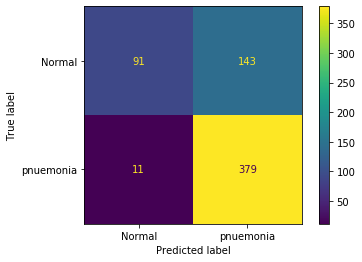

In [75]:
plot_confusion_matrix(svc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [59]:
val_list,svm_fpr2,svm_tpr2=performance_metrics(svc,Xtest_df,y_test)
performance_metric_df2.loc[len(performance_metric_df2)]=['SVM']+val_list


TEST METRICS ----------------------
Accuracy: 0.7532%
Recall: 0.9718%
Precision: 0.7261%
F1-score: 0.8312
AUC-score: 0.9012


### KNN

In [60]:

model_knn=gridsearchCV_model(Xtrain_combined,ytrain_combined,'KNN')
print("The best parameters are %s with a score of %0.2f"% (model_knn.best_params_, model_knn.best_score_))

knn=KNeighborsClassifier(n_neighbors=model_knn.best_params_['n_neighbors'])
knn.fit(Xtrain_df,y_smote)

The best parameters are {'n_neighbors': 3} with a score of 0.88


KNeighborsClassifier(n_neighbors=3)

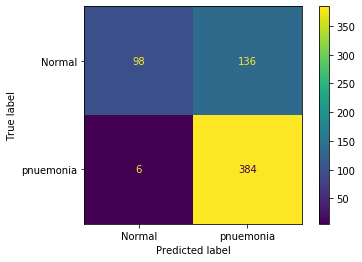

In [74]:
plot_confusion_matrix(knn, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [64]:
val_list,knn_fpr2,knn_tpr2=performance_metrics(knn,Xtest_df,y_test)
performance_metric_df2.loc[len(performance_metric_df2)]=['KNN']+val_list


TEST METRICS ----------------------
Accuracy: 0.7724%
Recall: 0.9846%
Precision: 0.7385%
F1-score: 0.844
AUC-score: 0.7996


### Random Forest

In [65]:
model_RFC=gridsearchCV_model(Xtrain_combined,ytrain_combined,'RFC')
print("The best parameters are %s with a score of %0.2f"% (model_RFC.best_params_, model_RFC.best_score_))

rfc=RandomForestClassifier(criterion=model_RFC.best_params_['criterion'],
                           max_features=model_RFC.best_params_['max_features'],
                           max_depth=model_RFC.best_params_['max_depth'],
                           n_estimators=model_RFC.best_params_['n_estimators'])
rfc.fit(Xtrain_df,y_smote)

The best parameters are {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200} with a score of 0.56


RandomForestClassifier(max_depth=7, n_estimators=200)

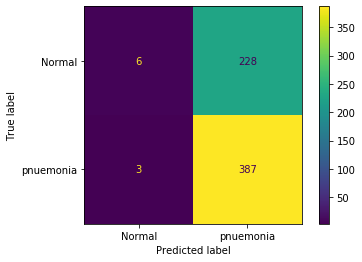

In [68]:
plot_confusion_matrix(rfc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [69]:
val_list,rfc_fpr2,rfc_tpr2=performance_metrics(rfc,Xtest_df,y_test)
performance_metric_df2.loc[len(performance_metric_df2)]=['RFC']+val_list


TEST METRICS ----------------------
Accuracy: 0.6298%
Recall: 0.9923%
Precision: 0.6293%
F1-score: 0.7702
AUC-score: 0.7717


### Decision Tree

In [70]:
model_DTC=gridsearchCV_model(Xtrain_combined,ytrain_combined,'DTC')
print("The best parameters are %s with a score of %0.2f"% (model_DTC.best_params_, model_DTC.best_score_))

dtc=DecisionTreeClassifier(max_leaf_nodes=model_DTC.best_params_['max_leaf_nodes'],
                           min_samples_split=model_DTC.best_params_['min_samples_split'])
dtc.fit(Xtrain_df,y_smote)

The best parameters are {'max_leaf_nodes': 5, 'min_samples_split': 2} with a score of 0.75


DecisionTreeClassifier(max_leaf_nodes=5)

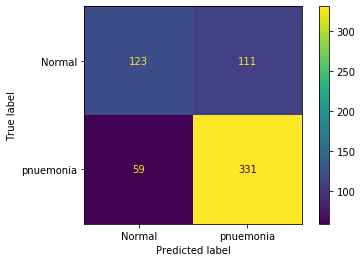

In [71]:
plot_confusion_matrix(dtc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [72]:
val_list,dtc_fpr2,dtc_tpr2=performance_metrics(dtc,Xtest_df,y_test)
performance_metric_df2.loc[len(performance_metric_df2)]=['DTC']+val_list


TEST METRICS ----------------------
Accuracy: 0.7276%
Recall: 0.8487%
Precision: 0.7489%
F1-score: 0.7957
AUC-score: 0.7084


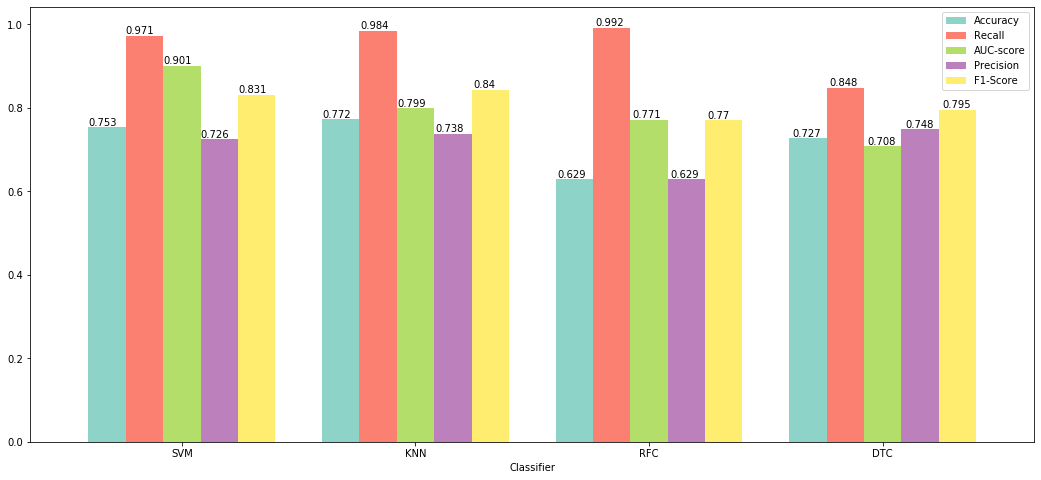

In [73]:
performance_classifiers(performance_metric_df2)

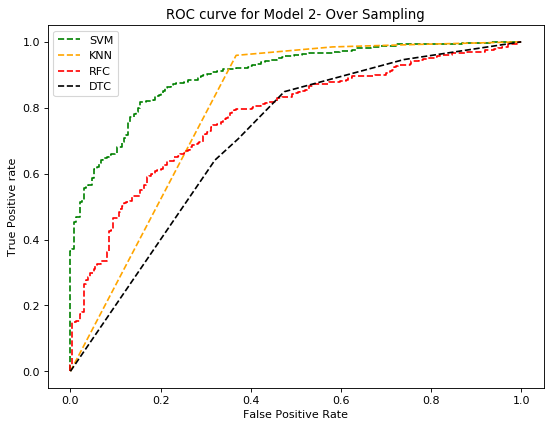

In [85]:

# plot roc curves
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(svm_fpr2, svm_tpr2, linestyle='--',color='green', label='SVM')
plt.plot(knn_fpr2, knn_tpr2, linestyle='--',color='orange', label='KNN')
#plt.plot(xg_fpr2, xg_tpr2, linestyle='--',color='blue', label='XGB')
plt.plot(rfc_fpr2, rfc_tpr2, linestyle='--',color='red', label='RFC')
plt.plot(dtc_fpr2, dtc_tpr2, linestyle='--',color='black', label='DTC')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Model 2- Over Sampling')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')


plt.show();

In [97]:
performance_metric_df2

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC
0,SVM,0.7532,0.7261,0.9718,0.8312,0.9012
1,KNN,0.7724,0.7385,0.9846,0.8440,0.7996
2,RFC,0.6298,0.6293,0.9923,0.7702,0.7717
3,DTC,0.7276,0.7489,0.8487,0.7957,0.7084


# ----------------------------------------------------------------------------------------------------

### COMBINED SAMPLING

### MODEL 3

In [86]:
from imblearn.combine import SMOTETomek 

In [87]:
rot_norimages=[]
for i in range(len(norm_images)):
    simage=norm_images[i]
    simage=cv2.flip(simage.reshape(100,100),90)
    simage=simage.flatten()
    rot_norimages.append(simage)
rot_norimages=np.array(rot_norimages)
norm_image = np.append(norm_images, rot_norimages, axis=0)
norm_label=np.append(norm_labels,norm_labels)

In [88]:
X_train_aug = np.append(norm_image, pneu_images, axis=0)
y_train_aug = np.append(norm_label, pneu_labels)

In [89]:
y_train_aug=np.where(y_train_aug =='normal', 0, y_train_aug)
y_train_aug=np.where(y_train_aug =='bacteria', 1, y_train_aug)
y_train_aug=np.where(y_train_aug =='virus', 1, y_train_aug)
np.unique(y_train_aug,return_counts=True)

(array(['0', '1'], dtype='<U8'), array([2682, 3875], dtype=int64))

In [90]:
rus = RandomUnderSampler(random_state=1)
X_train_aug_under, y_train_aug_under = rus.fit_resample(X_train_aug, y_train_aug)

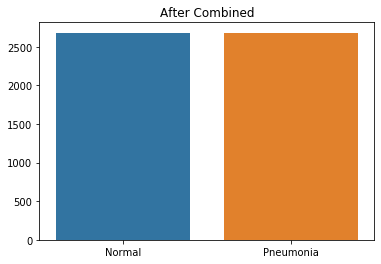

In [91]:
plt.title('After Combined')
sns.barplot(x=['Normal','Pneumonia'],y=[len(y_train_aug_under[y_train_aug_under =='0']),len(y_train_aug_under[y_train_aug_under =='1'])])

In [92]:
# # Getting back the pickled objects:
# with open('obj.pkl','rb') as f: 
#     X_train,y_train,X_val,y_val,X_test,y_test = pickle.load(f)

In [93]:

# smt = SMOTETomek(random_state=1)
# X_train, y_train = smt.fit_resample(X_train, y_train)

### PCA

In [94]:
# pricipal component calculated based on train set 
pca = PCA(n_components=.95)
pc_train = pca.fit_transform(X_train_aug_under)
Xtrain_df = pd.DataFrame(data = pc_train)
# Projecting the val set onto the reduced feature space obtained during the training.
pc_val = pca.transform(X_val)
Xval_df = pd.DataFrame(data = pc_val)
# Projecting the test set onto the reduced feature space obtained during the training.
pc_test = pca.transform(X_test)
Xtest_df = pd.DataFrame(data = pc_test)


In [95]:
# combining train and validation for hyperparameter tuning
Xtrain_combined=pd.concat([Xtrain_df, Xval_df], ignore_index=True)
ytrain_combined=np.concatenate((y_train_aug_under,y_val))
# setting -1 for train set and 0 for val set.The val_fold which have zero or positive values, will be kept in test.
val_fold = np.repeat([-1, 0], [len(Xtrain_df), len(Xval_df)])
# using PredefinedSplit returns the number of splitting iterations in the cross-validator
ps = PredefinedSplit(val_fold)


In [98]:
col_list=['Classifier','Accuracy','Precision','Recall','F1-Score','AUC']
performance_metric_df3=pd.DataFrame(columns=col_list)


### Train & Test the Model

### SVM

In [99]:
model_svm=gridsearchCV_model(Xtrain_combined,ytrain_combined,'SVM')
print("The best parameters are %s with a score of %0.2f"% (model_svm.best_params_, model_svm.best_score_))


The best parameters are {'C': 0.001, 'kernel': 'linear'} with a score of 0.88


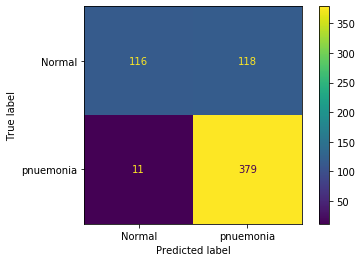

In [100]:
# using obtained best params for model building
svc=svm.SVC(kernel=model_svm.best_params_['kernel'],C= model_svm.best_params_['C'],probability=True)
svc.fit(Xtrain_df,y_train_aug_under)
plot_confusion_matrix(svc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [101]:
val_list,svm_fpr3, svm_tpr3=performance_metrics(svc,Xtest_df,y_test)
performance_metric_df3.loc[len(performance_metric_df3)]=['SVM']+val_list


TEST METRICS ----------------------
Accuracy: 0.7933%
Recall: 0.9718%
Precision: 0.7626%
F1-score: 0.8546
AUC-score: 0.9069


### k-nearest neighbors(KNN)

In [102]:
model_knn=gridsearchCV_model(Xtrain_combined,ytrain_combined,'KNN')
print("The best parameters are %s with a score of %0.2f"% (model_knn.best_params_, model_knn.best_score_))

knn=KNeighborsClassifier(n_neighbors=model_knn.best_params_['n_neighbors'])
knn.fit(Xtrain_df,y_train_aug_under)

The best parameters are {'n_neighbors': 2} with a score of 0.81


KNeighborsClassifier(n_neighbors=2)

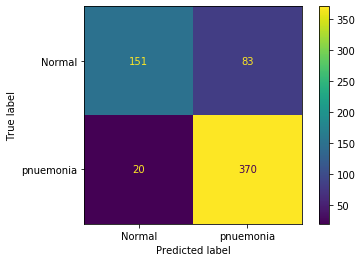

In [103]:
plot_confusion_matrix(knn, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [104]:
val_list,knn_fpr3, knn_tpr3=performance_metrics(knn,Xtest_df,y_test)
performance_metric_df3.loc[len(performance_metric_df3)]=['KNN']+val_list


TEST METRICS ----------------------
Accuracy: 0.8349%
Recall: 0.9487%
Precision: 0.8168%
F1-score: 0.8778
AUC-score: 0.8015


### Random Forest 

In [105]:
model_RFC=gridsearchCV_model(Xtrain_combined,ytrain_combined,'RFC')
print("The best parameters are %s with a score of %0.2f"% (model_RFC.best_params_, model_RFC.best_score_))

rfc=RandomForestClassifier(criterion=model_RFC.best_params_['criterion'],max_features=model_RFC.best_params_['max_features'],max_depth=model_RFC.best_params_['max_depth'],n_estimators=model_RFC.best_params_['n_estimators'])
rfc.fit(Xtrain_df,y_train_aug_under)

The best parameters are {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200} with a score of 0.94


RandomForestClassifier(max_depth=7, n_estimators=200)

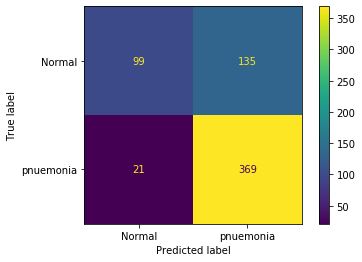

In [106]:
plot_confusion_matrix(rfc, Xtest_df, y_test,display_labels=['Normal','pnuemonia'])

In [107]:
val_list,rfc_fpr3, rfc_tpr3=performance_metrics(rfc,Xtest_df,y_test)
performance_metric_df3.loc[len(performance_metric_df3)]=['RFC']+val_list


TEST METRICS ----------------------
Accuracy: 0.75%
Recall: 0.9462%
Precision: 0.7321%
F1-score: 0.8255
AUC-score: 0.8567


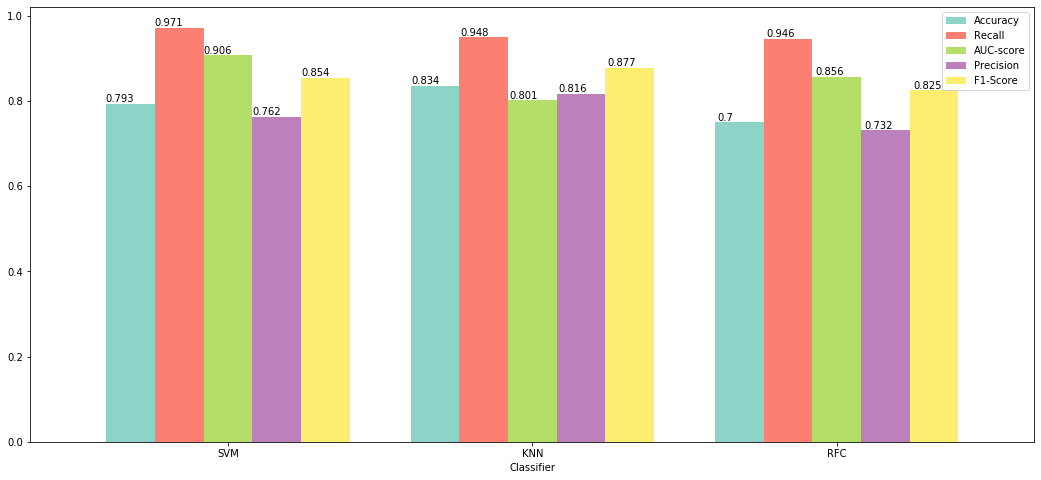

In [108]:
performance_classifiers(performance_metric_df3)

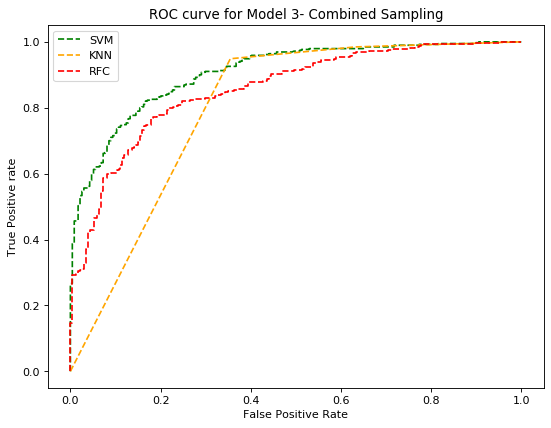

In [146]:
# plot roc curves
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(svm_fpr3, svm_tpr3, linestyle='--',color='green', label='SVM')
plt.plot(knn_fpr3, knn_tpr3, linestyle='--',color='orange', label='KNN')
#plt.plot(xg_fpr2, xg_tpr2, linestyle='--',color='blue', label='XGB')
plt.plot(rfc_fpr3, rfc_tpr3, linestyle='--',color='red', label='RFC')
#plt.plot(dtc_fpr2, dtc_tpr2, linestyle='--',color='black', label='DTC')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for Model 3- Combined Sampling')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')


plt.show();

In [111]:
performance_metric_df3

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC
0,SVM,0.7933,0.7626,0.9718,0.8546,0.9069
1,KNN,0.8349,0.8168,0.9487,0.8778,0.8015
2,RFC,0.7500,0.7321,0.9462,0.8255,0.8567


# ------------------------------------------------------------------------------------------------------

## CNN MODEL

In [110]:
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(22)

#### Getting back the pickled objects

In [112]:

with open('obj_cnn.pkl','rb') as f: 
    X_train_cnn,y_train_cnn,X_val_cnn,y_val_cnn,X_test_cnn,y_test_cnn = pickle.load(f)

#### Label Preprocessing

In [113]:
y_train_cnn = y_train_cnn[:, np.newaxis]
y_val_cnn=y_val_cnn[:, np.newaxis]
y_test_cnn = y_test_cnn[:, np.newaxis]

In [114]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [115]:
y_train_one_hot = one_hot_encoder.fit_transform(y_train_cnn)
y_val_one_hot=one_hot_encoder.fit_transform(y_val_cnn)
#y_test_one_hot = one_hot_encoder.transform(y_test_cnn)

#### Reshaping X data

In [116]:
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
X_val_cnn = X_val_cnn.reshape(X_val_cnn.shape[0], X_val_cnn.shape[1], X_val_cnn.shape[2], 1)
X_test_cnn = X_test_cnn.reshape(X_test.shape[0], X_test_cnn.shape[1], X_test_cnn.shape[2], 1)

In [117]:
print(X_train_cnn.shape)
print(X_val_cnn.shape)
print(X_test_cnn.shape)

(5216, 100, 100, 1)
(16, 100, 100, 1)
(624, 100, 100, 1)


### Data augmentation

The main point of augmenting data — or more specifically augmenting train data is that we are going to increase the number of data used for training by creating more samples with some sort of randomness on each of them. These randomnesses might include translations, rotations, scaling, shearing, and flips.
Such a technique is able to help our neural network classifier to reduce overfitting, or in other words, it can make the model generalize data samples better.implemented using ImageDataGenerator object which can be imported from the Keras module.

In [133]:
datagen = ImageDataGenerator(
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

Initializing the datagen object is to fit it with  X_train. This process is then followed by applying the flow() method in which this step is useful such that the train_gen object is now able to generate batches of augmented data.

In [134]:
datagen.fit(X_train_cnn)
train_gen = datagen.flow(X_train_cnn, y_train_one_hot, batch_size=32)

#### CNN (Convolutional Neural Network)

In [135]:
input1 = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1))

cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Conv2D(32, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = Conv2D(32, (2, 2), activation='relu', strides=(1, 1), 
   padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Flatten()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(2, activation='sigmoid')(cnn)

model = Model(inputs=input1, outputs=output1)

In [136]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        4128      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0   

In [137]:
from tensorflow.keras.optimizers import RMSprop
#The final result will be 0 and 1 hence binary_crossentropy will be good for this model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [138]:
history = model.fit(train_gen ,epochs=20, validation_data=(X_val_cnn, y_val_one_hot))

Epoch 1/20
163/163 [==============================] - 113s 689ms/step - loss: 1.7451 - acc: 0.7681 - val_loss: 0.5464 - val_acc: 0.6875
Epoch 2/20
163/163 [==============================] - 113s 693ms/step - loss: 0.2432 - acc: 0.8971 - val_loss: 0.3630 - val_acc: 0.8750
Epoch 3/20
163/163 [==============================] - 115s 702ms/step - loss: 0.2026 - acc: 0.9114 - val_loss: 0.5999 - val_acc: 0.6875
Epoch 4/20
163/163 [==============================] - 113s 696ms/step - loss: 0.1836 - acc: 0.9223 - val_loss: 0.1801 - val_acc: 0.9375
Epoch 5/20
163/163 [==============================] - 113s 695ms/step - loss: 0.1724 - acc: 0.9336 - val_loss: 0.1866 - val_acc: 0.8750
Epoch 6/20
163/163 [==============================] - 105s 643ms/step - loss: 0.1424 - acc: 0.9445 - val_loss: 1.4739 - val_acc: 0.6250
Epoch 7/20
163/163 [==============================] - 115s 705ms/step - loss: 0.1688 - acc: 0.9330 - val_loss: 0.4413 - val_acc: 0.8125
Epoch 8/20
163/163 [============================

#### plot the improvement of accuracy score and the decrease of loss value

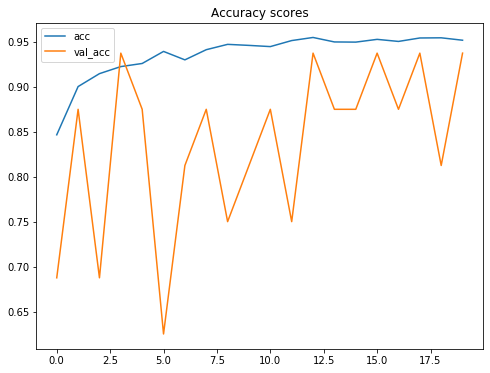

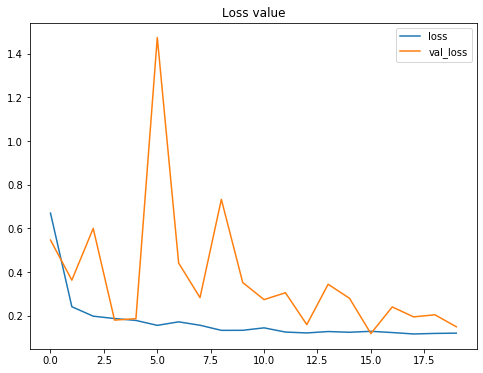

In [143]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

#### Model evaluation

In [139]:
predictions = model.predict(X_test_cnn)
predictions = one_hot_encoder.inverse_transform(predictions)

In [140]:
acc = round(accuracy_score(y_test_cnn, predictions),4)
cm = confusion_matrix(y_test_cnn, predictions)
tn, fp, fn, tp = cm.ravel()
precision = round(tp/(tp+fp),4)
recall = round(tp/(tp+fn),4)
f1_score=round(2*precision*recall/(precision+recall),4)
 
print('\nTEST METRICS ----------------------')
print('Accuracy: {}%'.format(acc))
print('Recall: {}%'.format(recall))
print('Precision: {}%'.format(precision))
   
print('F1-score: {}'.format(f1_score))



TEST METRICS ----------------------
Accuracy: 0.8846%
Recall: 0.9718%
Precision: 0.8614%
F1-score: 0.9133


# ------------------------------------------------------------------------------------------------------

## CONCLUSION

In this case study of pneumonia detection,accuracy score of each model help to identify upto what ratio our model is able to do correct predictions, which is an important factor for evaluting the models.


The incorrect predection of the algorithm can be summarized as `False Negative` and `False Positive`. First, the test turns out negative while the test subject is really sick, it is a `False Negative`. Second, the test can be positive while the test subject is really healthy, which is a `False Positive`.
When predcting pneuomina , the second senario if the test is False Positive,  further diagnosis will help to understand that it's a false predction whereas that's not the case with the first senario if people are really sick and the model fail to idenitfy it, that's going to be a serious issue. Hence `False Negative` senario is important and has to be limited or minimised in this case study.The best metric can be used to determine this is `Recall`.

The `Area Under the Curve` (AUC) gives a single numeric indicator of the discriminative power of a diagnostic test.


<img src="metrics1.jpg" width="1000" />

An `ROC curve` is based on the notion of a "separator" scale, on which results for the diseased and nondiseased form a pair of overlapping distributions (1). The complete separation of the two underlying distributions implies a perfectly discriminating test while complete overlap implies no discrimination. The ROC curve shows the trade off between the true positive fraction (TPF) and false positive fraction (FPF) as one change the criterion for positivity.

<img src="ROCC.jpg" width="1000" />

To conclude from the above metrics barplots,clearly see that SVM provide a stable results for 3 different method compared to other models with a good recall and AUC score. `SVM - undersampling` obtained `81.7%,97.6%,92.5%` `Accuracy,Recall & AUC`. `KNN-undersambling` obtained `84%,95.3%,89%` `Accuracy,Recall & AUC`. Noted the `XGB` also a good model with 95.3%,90% and 81% Recall,AUC and accuracy. oversampling using smote has dropped the accuracy for all the models.KNN & SVM able to sustain the accuracy in the case of combined sampling.Hence for this case study `SVM - undersampling` is the good model for predictions.

NOTE:CNN Model able to achieve 88%,97%,86% Accuracy,Recall and Precision.

# ------------------------------------------------------------------------------------------------------